### Statsmodels

In [1]:
import seaborn as sns

In [2]:
import statsmodels

In [3]:
import statsmodels.formula.api as smf

In [4]:
df = sns.load_dataset("titanic")

In [5]:
df.rename({"class":"classe"}, axis=1, inplace=True)

In [6]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,classe,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Regression linéaire simple avec R style formulas

In [7]:
results = smf.ols('survived ~ age + sibsp + fare + classe', data=df).fit() # Sibsp - Number of Siblings/Spouses Aboard


In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     33.16
Date:                Fri, 30 Apr 2021   Prob (F-statistic):           1.90e-30
Time:                        07:01:56   Log-Likelihood:                -430.30
No. Observations:                 714   AIC:                             872.6
Df Residuals:                     708   BIC:                             900.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9329      0.074     12.692      0.000       0.789       1.077
classe[T.Second]    -0.1938      0.056     -3.480      0.001      -0.303      -0.084
classe[T.Third]     -0.4616      0.054     -8.518      0.000      -0.568      -0.355
age                 -0.0087      0.001     -6.650      0.000      -0.011      -0.006
sibsp               -0.0427      0.019     -2.231      0.026      -0.080      -0.005
fare                 0.0008      0.000      2.077      0.038     4.6e-05       0.002
==============================================================================
Omnibus:                      258.942   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.026
Skew:                           0.336   Prob(JB):                     2.26e-11
Kurtosis:                       1.906   Cond. No.                         387.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Format classique

In [9]:
import pandas as pd

In [10]:
classe_dummies = pd.get_dummies(df.classe)

In [11]:
df = pd.merge(df, classe_dummies, left_index=True, right_index=True)

In [12]:
import statsmodels.api as sm
y = df.dropna().survived
X = df.dropna()[["age","sibsp","fare", "Second", "Third"]]
X = sm.add_constant(X)

In [13]:
sm.OLS(y, X.dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     3.619
Date:                Fri, 30 Apr 2021   Prob (F-statistic):            0.00385
Time:                        07:01:59   Log-Likelihood:                -111.18
No. Observations:                 182   AIC:                             234.4
Df Residuals:                     176   BIC:                             253.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9138      0.115      7.965      0.000       0.687       1.140
age           -0.0078      0.002     -3.328      0.001      -0.012      -0.003
sibsp          0.0193      0.055      0.351      0.726      -0.090       0.128
fare           0.0005      0.000      1.016      0.311      -0.000       0.001
Second         0.0662      0.132      0.502      0.616      -0.194       0.326
Third         -0.2595      0.160     -1.625      0.106      -0.575       0.056
==============================================================================
Omnibus:                       74.262   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.162
Skew:                          -0.658   Prob(JB):                     9.34e-06
Kurtosis:                       1.849   Cond. No.                         601.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercice avec les accidents de la route

1. Récupérer la base de donnée des accidents de la route 2017, 2018, 2019
1. Mettre en forme la donnée pour avoir nombre de morts par accident avec la vitesse sur la route
1. Faire une regression linéaire en double différence pour voir si le passage à 80 km/h diminue la probabilité d'avoir au moins un mort sur un accident.

regression
$y = \alpha + \beta_0 \text{Après le 1/07/18} \\
   + \beta_1 \text{route_passe_de_90_a_80} \\
   + \beta_2 \text{route_passe_de_90_a_80} \times \text{Après le 1/07/18} + \epsilon
   $

Les routes qui sont passées de 90 à 80:
   1. route à double sens sans séparateur central.

In [9]:
import pandas as pd
caracteristiques_2019 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/e22ba475-45a3-46ac-a0f7-9ca9ed1e283a", sep=";")
lieux_2019 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/2ad65965-36a1-4452-9c08-61a6c874e3e6", sep = ";")
usagers_2019 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/36b1b7b3-84b4-4901-9163-59ae8a9e3028", sep = ";")
vehicules_2019 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/780cd335-5048-4bd6-a841-105b44eb2667", sep = ";")

In [24]:
caracteristiques_2018 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/6eee0852-cbd7-447e-bd70-37c433029405", encoding='latin-1', sep=";")
lieux_2018 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/d9d65ca1-16a3-4ea3-b7c8-2412c92b69d9", sep = ",", low_memory=False)
usagers_2018 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/72b251e1-d5e1-4c46-a1c2-c65f1b26549a", sep = ",")
vehicules_2018 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/b4aaeede-1a80-4d76-8f97-543dad479167", sep = ",")

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [63]:
caracteristiques_2017 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/9a7d408b-dd72-4959-ae7d-c854ec505354", encoding='latin-1', sep=",")
lieux_2017 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/9b76a7b6-3eef-4864-b2da-1834417e305c", sep = ",")
usagers_2017 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/07bfe612-0ad9-48ef-92d3-f5466f8465fe", sep = ",")
vehicules_2017 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/780cd335-5048-4bd6-a841-105b44eb2667", sep = ";")

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


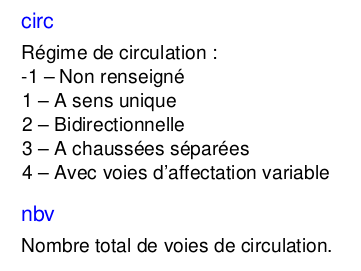

lartpc
Largeur du terre-plein central (TPC) s'il existe (en m).  

vma
Vitesse maximale autorisée sur le lieu et au moment de l’accident.


grav
Gravité de blessure de l'usager, les usagers accidentés sont classés en trois catégories de
victimes plus les indemnes :
1 – Indemne
2 – Tué
3 – Blessé hospitalisé
4 – Blessé léger
sexe
Sexe de l'usager :
1 – Masculin
2 – Féminin
An_nais
Année de naissance de l'usager.

In [151]:
pd.options.display.max_columns = 999

In [152]:
def prepare_data(caracteristiques, lieux, usagers):
     return (
            caracteristiques
                .merge(lieux, on = ["Num_Acc"])
                .merge(usagers.query("grav == 2").groupby("Num_Acc").size().rename("Mort_bool"), left_on = "Num_Acc", right_index=True, how="left")
                .assign(Mort_bool = lambda x: x.Mort_bool.fillna(0))
            )

In [153]:
lieux_2018

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201800000001,3,41,NaN,C,2.0,2.0,NaN,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0
1,201800000002,4,41,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0
2,201800000003,3,39,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
3,201800000004,3,39,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
4,201800000005,4,NaN,NaN,NaN,1.0,1.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57778,201800057779,4,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,1.0,0.0,3.0,0.0
57779,201800057780,2,2,NaN,NaN,0.0,2.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,1.0,0.0,3.0,0.0
57780,201800057781,2,1,NaN,NaN,2.0,2.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,1.0,0.0,3.0,0.0
57781,201800057782,4,NaN,NaN,NaN,0.0,2.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,1.0,0.0,3.0,0.0


In [154]:
df_accident.nbv.value_counts()

 2.0     106813
 4.0      19616
 1.0      19522
 3.0      12956
 0.0       7667
 6.0       4389
 5.0       2467
 8.0       1251
-1.0        650
 7.0        428
 10.0       313
 9.0        194
 11.0        70
 12.0        44
 13.0         3
Name: nbv, dtype: int64

In [180]:
import statsmodels.formula.api as smf
df_accident =(
    pd.concat([
                caracteristiques_2019.pipe(prepare_data, lieux_2019, usagers_2019),
                caracteristiques_2018.pipe(prepare_data, lieux_2018, usagers_2018).assign(an = lambda x: pd.to_numeric("20"+ x.an.astype("str"))),
                caracteristiques_2017.pipe(prepare_data, lieux_2017, usagers_2017).assign(an = lambda x: pd.to_numeric("20"+ x.an.astype("str"))),
                    ]
            ).assign(changement_vitesse = lambda x: (
                                    (x.lartpc.fillna(0) == 0) # pas de terre plein central
                                    & (x.circ == 2) # sens de circulation double
                                    # & ((x.vma == 80) | (x.vma == 90)) # limitation de vitesse à 80 ou 90 km/h ##Commenté car on a pas l'info de la vitesse
                                    & (x.catr.isin([2])) ## que les routes nationales et départementales
                                    & (x.nbv ==2)  ### que si 2 voies de circulation
                                    
                                    )

            ).assign(date =  lambda x: pd.to_datetime(x[["an","mois","jour"]].set_axis(["year","month","day"], axis=1))
                    )
            .assign(after_treatment = lambda x: x.date > pd.Timestamp(2018,7,1))
)

    
smf.ols('Mort_bool ~ after_treatment*changement_vitesse', data=df_accident).fit().summary()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mort_bool   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     105.7
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           2.38e-68
Time:                        02:08:23   Log-Likelihood:                -8454.3
No. Observations:              177324   AIC:                         1.692e+04
Df Residuals:                  177320   BIC:                         1.696e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              0.0577      0.001     66.810      0.000       0.056       0.059
after_treatment[T.True]                               -0.0002      0.001     -0.189      0.850      -0.003       0.002
changement_vitesse[T.True]                             0.0614      0.006     10.218      0.000       0.050       0.073
after_treatment[T.True]:changement_vitesse[T.True]     0.0192      0.008      2.355      0.019       0.003       0.035
==============================================================================
Omnibus:                   172191.127   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7841104.395
Skew:                           4.855   Prob(JB):                         0.00
Kurtosis:                      34.096   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='date'>

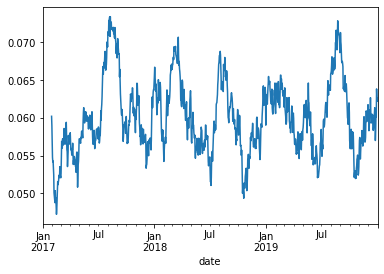

In [175]:
df_accident.groupby("date").Mort_bool.mean().rolling(30).mean().plot()

In [157]:
df_accident.pivot_table(index = ["an", "changement_vitesse"], columns = "after_treatment", values = "Mort_bool", ) 

after_treatment             False      True
an   changement_vitesse                    
2017 False               0.038674       NaN
     True                0.119870       NaN
2018 False               0.031431  0.034672
     True                0.129307  0.120532
2019 False                    NaN  0.034986
     True                     NaN  0.122633

In [158]:
df_accident.value_counts(["an", "changement_vitesse"])

an    changement_vitesse
2017  False                 45276
2019  False                 42417
2018  False                 41621
2019  True                  16423
2018  True                  16162
2017  True                  15425
dtype: int64